# behavioral analysis
find any significant correlation between metrics (task scores) and features (fMRI activity for brain regions)

In [1]:
import pandas as pd

In [2]:
dfb = pd.read_csv('/Users/qasem/PycharmProjects/grad_ecc_RL_data/RL_behavior.csv')  # df behaviour

In [3]:
dfb.head()

,Subject,Block,Trial,Score,ReactionTime,MovementTime,Valid
0,AB1,1,1,53.0,0.365009,0.182444,True
1,AB1,1,2,51.0,0.548555,0.402011,True
2,AB1,1,3,7.0,0.472627,0.269147,True
3,AB1,1,4,0.0,0.557651,0.289636,True
4,AB1,1,5,34.0,0.588884,0.211777,True


In [4]:
dfb.Subject.nunique()

45

number of subjects that we have valid task scores from

In [5]:
S = dfb.Subject.unique()

## exclude behavioural outliers

In [6]:
match = pd.read_csv('/Users/qasem/PycharmProjects/gradients-rl-task/data/participants.tsv', delimiter='\t')
match

,participant_id,dicom_dir,exclude
0,1,AB1,0
1,2,AG1,0
2,3,AH1,0
3,4,AM1,0
4,5,AN1,1
5,6,AP1,0
6,7,AV1,0
7,8,BN1,0
8,9,CD1,0
9,10,CG1,0


In [7]:
set(match['dicom_dir']) - set(S)

{'RG1'}

we have no task score data from `RG1`

## exploration on task scores

In [8]:
import seaborn as sns

<AxesSubplot:xlabel='Block', ylabel='count'>

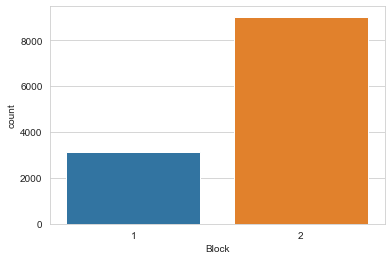

In [9]:
sns.countplot(data=dfb, x='Block')

In [10]:
dfb['Trial'].max()

201

<AxesSubplot:>

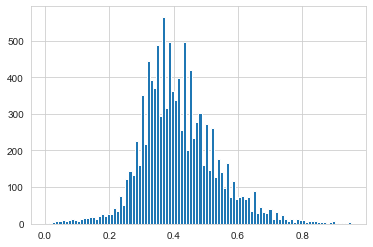

In [11]:
dfb['ReactionTime'].hist(bins=100)

<AxesSubplot:>

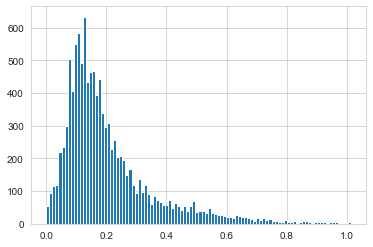

In [12]:
dfb['MovementTime'].hist(bins=100)

In [13]:
# block 1 is baseline
# block 2 is learning

In [14]:
dfl = dfb[dfb['Block'] == 2]    # df learning

In [15]:
from matplotlib import pyplot as plt

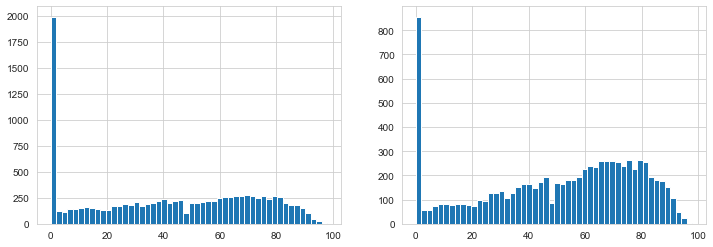

In [16]:
# score distribution
_, ax = plt.subplots(ncols=2, figsize=(12,4))
dfb['Score'].hist(bins=50, ax=ax[0])
dfl['Score'].hist(bins=50, ax=ax[1])    # RIGHT PANEL: score during learning block
plt.show()

## distribution of zero scores

In [17]:
dfl[dfl.Score == 0].groupby('Subject').Score.count()

Subject
AB1    13
AG1     2
AH1     7
AM1    33
AN1    34
AP1     4
AV1     7
BN1    11
CD1     6
CG1     5
CH1     9
CK1    33
CM1     7
CM2     1
CS1    64
EH1    43
EK1    21
HK1    34
HS1     2
JC1    11
JH1    32
JH2    19
JM1    28
JR1     6
JS1     4
KK1    66
KL1    51
KP1    12
KR1     6
LB1    83
MB1     5
MG1     1
MP1     4
NC1    29
NW1    53
SH1     2
SK1    13
SM1     9
SM2     1
SR1     7
SS1    11
TC1     3
UP1     8
WK1     2
ZN1    28
Name: Score, dtype: int64

'CS1', 'KK1', 'LB1' have lots of zeros. does it only come from their bad performance?

<AxesSubplot:ylabel='Score'>

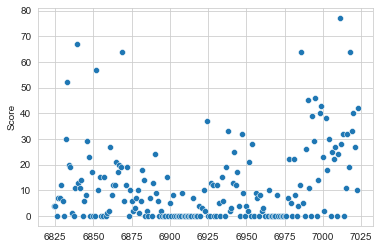

In [18]:
d = dfb.loc[(dfb.Subject=='KK1')&(dfb.Block==2), 'Score'].dropna()
sns.scatterplot(data=d)

<AxesSubplot:ylabel='Score'>

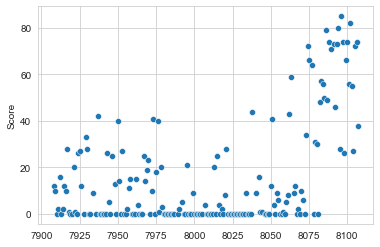

In [19]:
d = dfb.loc[(dfb.Subject=='LB1')&(dfb.Block==2), 'Score'].dropna()
sns.scatterplot(data=d)

Baseline block consistently has zeros

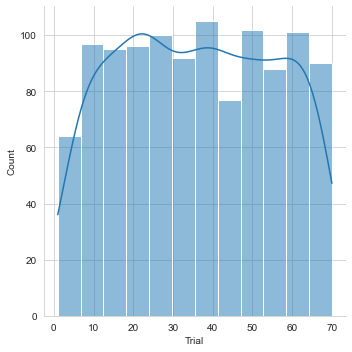

In [20]:
sns.displot(dfb[(dfb.Score == 0) & (dfb.Block == 1)], x='Trial', kde=True)

Learning block starts with zeros and it shrinks

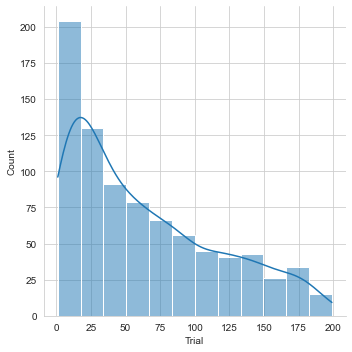

In [21]:
sns.displot(dfb.loc[(dfb.Score == 0) & (dfb.Block == 2)], x='Trial', kde=True)

In [22]:
dfb.Score.astype(str).describe()

count     12170
unique      100
top         0.0
freq       1937
Name: Score, dtype: object

is `Score` the best measure?

In [23]:
# todo get path trace to try others

In [24]:
dfb.Valid.describe()

count     12170
unique        2
top        True
freq      11153
Name: Valid, dtype: object

In [25]:
dfb.groupby('Subject').Valid.count()

Subject
AB1    271
AG1    271
AH1    271
AM1    271
AN1    270
AP1    271
AV1    262
BN1    271
CD1    271
CG1    271
CH1    271
CK1    271
CM1    271
CM2    271
CS1    271
EH1    271
EK1    271
HK1    270
HS1    269
JC1    265
JH1    270
JH2    271
JM1    271
JR1    271
JS1    270
KK1    271
KL1    271
KP1    271
KR1    271
LB1    271
MB1    271
MG1    271
MP1    271
NC1    270
NW1    269
SH1    271
SK1    271
SM1    271
SM2    271
SR1    271
SS1    271
TC1    271
UP1    271
WK1    271
ZN1    270
Name: Valid, dtype: int64

In [26]:
dfb[dfb.Score > 0].groupby('Subject').Valid.count()

Subject
AB1    227
AG1    242
AH1    235
AM1    189
AN1    107
AP1    248
AV1    208
BN1    203
CD1    237
CG1    188
CH1    241
CK1    177
CM1    231
CM2    224
CS1    139
EH1    171
EK1    219
HK1    186
HS1    184
JC1    238
JH1    148
JH2    132
JM1    208
JR1    251
JS1    144
KK1    197
KL1    140
KP1    225
KR1    231
LB1    158
MB1    256
MG1    268
MP1    190
NC1    174
NW1    193
SH1    223
SK1    250
SM1    224
SM2    264
SR1    203
SS1    164
TC1    233
UP1    238
WK1    235
ZN1    173
Name: Valid, dtype: int64

In [27]:
# J's comments. try removing zeros
# how they're distributed through time. and for subjects

score in learning block during trials

<AxesSubplot:xlabel='Trial', ylabel='Score'>

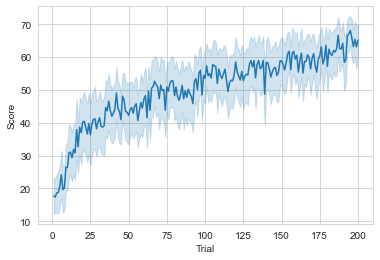

In [28]:
sns.lineplot(data=dfb[dfb.Block == 2], x='Trial', y='Score')

### removing zeros

zero not included:

<AxesSubplot:xlabel='Trial', ylabel='Score'>

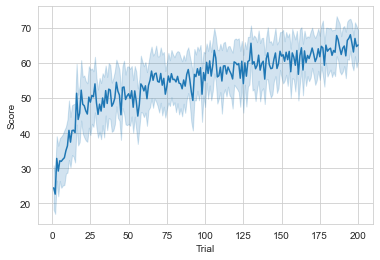

In [29]:
sns.lineplot(data=dfb[(dfb.Block == 2)&(dfb.Score>0)], x='Trial', y='Score')

<AxesSubplot:xlabel='Trial', ylabel='Score'>

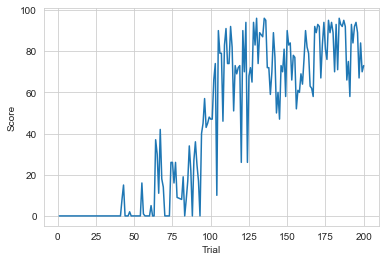

In [30]:
# dfb = dfb[dfb.Score > 0]

sns.lineplot(data=dfb[(dfb.Subject == 'CS1') & (dfb.Block == 2)], x='Trial', y='Score')
# this subject starts with all zeros

# dfb = dfb[dfb.Subject != 'CS1']

In [31]:
dfb[dfb.Block == 1].Trial.max()

70

In [32]:
dfb[dfb.Block == 2].Trial.max()

201

In [33]:
# maybe cluster subjects here: eg, based on average of last trials

/Users/qasem/opt/anaconda3/envs/brainv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/qasem/opt/anaconda3/envs/brainv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 21.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Subject', ylabel='Score'>

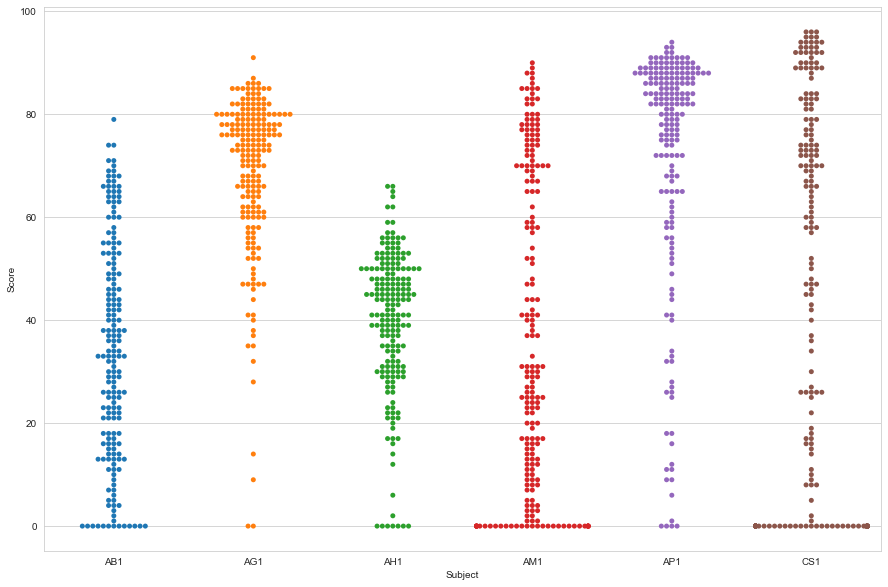

In [34]:
slist = ['AB1', 'AG1', 'AH1', 'AM1', 'AP1', 'CS1']
fig, ax = plt.subplots(figsize=(15,10))
sns.swarmplot(data=dfb[(dfb.Block == 2) & (dfb.Subject.isin(slist))],
             x='Subject', y='Score', ax=ax)

In [35]:
def metric4subjects(df, window='first', rename=None,
                      score_window=40, block=2, agg='mean'):
    if window == 'first':   sub_window = df.Trial <= score_window
    elif window == 'last':
        max_ = df[df.Block == block].Trial.max()
        sub_window = df.Trial >= max_ - score_window
    if rename is None:  rename = 'Score_' + agg + '_' + window + str(score_window)

    return df[(df.Block == block) & sub_window].groupby('Subject')['Score'].agg(agg).rename(rename)

### how variance mean plays out

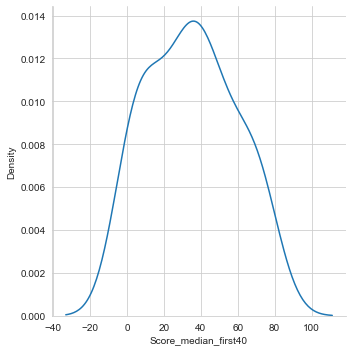

In [36]:
subj_init_score = metric4subjects(dfb, score_window=40, block=2, agg='median')
sns.displot(subj_init_score, kind='kde')

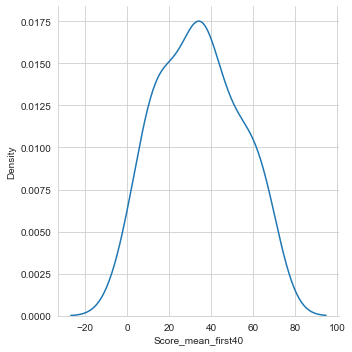

In [37]:
subj_init_score = metric4subjects(dfb, score_window=40, block=2, agg='mean')
sns.displot(subj_init_score, kind='kde')

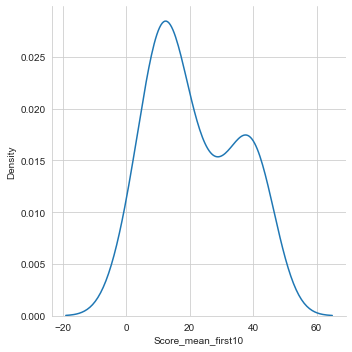

In [38]:
subj_init_score = metric4subjects(dfb, score_window=10, block=2, agg='mean')
sns.displot(subj_init_score, kind='kde')

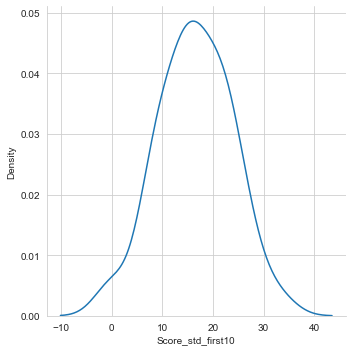

In [39]:
subj_init_score = metric4subjects(dfb, score_window=10, block=2, agg='std')
sns.displot(subj_init_score, kind='kde')

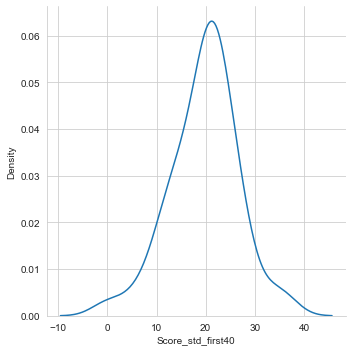

In [40]:
subj_init_score = metric4subjects(dfb, score_window=40, block=2, agg='std')
sns.displot(subj_init_score, kind='kde')

## define metrics

In [41]:
from scipy.stats import pearsonr

0.7142858232009129

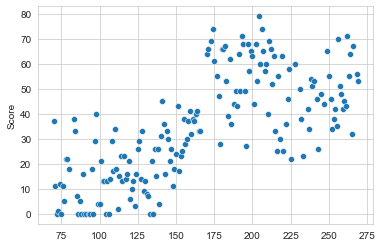

In [42]:
d = dfb.loc[(dfb.Subject=='AB1')&(dfb.Block==2), 'Score'].dropna()
sns.scatterplot(data=d)
pearsonr(d, d.index)[0]

0.061932891146480186

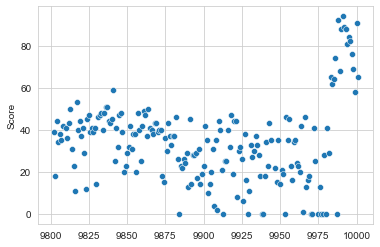

In [43]:
d = dfb.loc[(dfb.Subject=='SK1')&(dfb.Block==2), 'Score'].dropna()
sns.scatterplot(data=d)
pearsonr(d, d.index)[0]

In [44]:
metrics = pd.concat([
        metric4subjects(dfb, score_window=20, agg='median', window='first'),
        metric4subjects(dfb, score_window=20, agg='median', window='last'),
        metric4subjects(dfb, score_window=20, agg='mean', window='first'),
        metric4subjects(dfb, score_window=20, agg='mean', window='last'),
        # metric4subjects(dfb, score_window=40, agg='mean', window='first'),
        # metric4subjects(dfb, score_window=40, agg='mean', window='last'),
        metric4subjects(dfb, score_window=20, agg='std', window='first'),
        metric4subjects(dfb, score_window=20, agg='std', window='last'),
        metric4subjects(dfb, score_window=70, agg='std', window='first',
                          block=1, rename='Score_std_baseline'),
    ], axis=1, join="outer", ignore_index=False)

In [45]:
metrics['Score_median_diff20'] = metrics['Score_median_last20'] - metrics['Score_median_first20']
metrics['Score_mean_diff20'] = metrics['Score_mean_last20'] - metrics['Score_mean_first20']

read scores for each subject here:

In [46]:
metrics

,Score_median_first20,Score_median_last20,Score_mean_first20,Score_mean_last20,Score_std_first20,Score_std_last20,Score_std_baseline,Score_median_diff20,Score_mean_diff20
Subject,,,,,,,,,
AB1,11.0,48.0,13.222222,49.842105,12.808800,12.001218,15.662124,37.0,36.619883
AG1,44.0,69.0,39.000000,69.500000,17.572074,9.923391,14.408557,25.0,30.500000
AH1,41.5,48.0,40.222222,47.722222,13.117369,4.226047,16.971716,6.5,7.500000
AM1,6.0,75.0,16.400000,67.000000,19.765467,25.941229,16.398126,69.0,50.600000
AN1,38.5,38.0,38.285714,35.666667,26.836911,29.916551,27.484138,-0.5,-2.619048
AP1,11.5,85.0,17.650000,84.500000,17.499699,4.696023,10.990408,73.5,66.850000
AV1,45.0,61.0,36.421053,62.789474,28.466971,7.554093,18.265467,16.0,26.368421
BN1,0.0,84.0,31.300000,83.300000,36.904001,5.171786,9.816758,84.0,52.000000
CD1,12.5,64.0,12.200000,58.600000,11.514750,15.428613,11.781833,51.5,46.400000


In [47]:
metrics['Score_r'] = dfb[dfb.Block == 2].dropna().groupby('Subject').apply(lambda r: pearsonr(r['Score'], r['Trial'])[0])

<AxesSubplot:xlabel='Score_mean_diff20', ylabel='Score_r'>

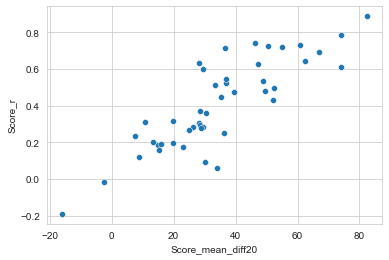

In [48]:
sns.scatterplot(data=metrics, x='Score_mean_diff20', y='Score_r')

In [49]:
metrics[(metrics.Score_r > .7)&(metrics.Score_mean_diff20 < 40)]

,Score_median_first20,Score_median_last20,Score_mean_first20,Score_mean_last20,Score_std_first20,Score_std_last20,Score_std_baseline,Score_median_diff20,Score_mean_diff20,Score_r
Subject,,,,,,,,,,
AB1,11.0,48.0,13.222222,49.842105,12.8088,12.001218,15.662124,37.0,36.619883,0.714286


# features
they were metrics. Now, activity of brain regions as features.

In [50]:
dfg = pd.read_csv('gradients.csv')  # df gradient values
dfg

,subject,epoch,region,label,g1,g2,g3,g4,ecc
0,1,baseline,7Networks_LH_Vis_1,VisCort,0.480404,-0.263703,2.180387,0.402468,2.283943
1,1,baseline,7Networks_LH_Vis_2,VisCort,0.573926,1.403178,1.020010,-0.193533,1.837437
2,1,baseline,7Networks_LH_Vis_3,VisCort,0.291590,0.662147,1.628197,-0.588381,1.876348
3,1,baseline,7Networks_LH_Vis_4,VisCort,2.352881,2.066208,0.201950,0.252048,3.147948
4,1,baseline,7Networks_LH_Vis_5,VisCort,0.388140,0.618736,1.054415,-0.233904,1.303837
...,...,...,...,...,...,...,...,...,...
118555,46,late,Vermis IX,VermisSubC,-0.427469,-0.480867,2.758838,3.350099,4.387290
118556,46,late,Right IX,RightSubC,-0.001993,-0.173274,2.976064,3.083490,4.288927
118557,46,late,Left X,LeftSubC,0.033317,-0.974091,3.004128,2.663435,4.131420
118558,46,late,Vermis X,VermisSubC,1.201635,-0.963183,2.926164,2.514043,4.153853


In [51]:
dff = pd.merge(dfg, match[match.exclude==0], left_on='subject', right_on='participant_id', how='inner') # df features
dff = dff.rename(columns={'dicom_dir': 'Subject'})
dff = dff.set_index(['subject', 'Subject', 'epoch', 'region', 'label'])[['ecc']].unstack('epoch')
dff = dff.droplevel(level=0, axis=1)

In [52]:
# change of ecc for a region: baseline to early - early to late

In [53]:
dff['b2e'] = dff['early'] - dff['baseline']
dff['e2l'] = dff['late'] - dff['early']
dff = dff.reorder_levels([2, 3, 0, 1])
dff

,,,epoch,baseline,early,late,b2e,e2l
region,label,subject,Subject,,,,,
7Networks_LH_Cont_Cing_1,ContCort,1,AB1,1.711138,2.394232,2.146025,0.683094,-0.248207
7Networks_LH_Cont_Cing_2,ContCort,1,AB1,3.102014,2.898759,1.677897,-0.203255,-1.220862
7Networks_LH_Cont_Cing_3,ContCort,1,AB1,3.292430,2.884357,2.163636,-0.408073,-0.720721
7Networks_LH_Cont_Cing_4,ContCort,1,AB1,1.042868,2.118850,1.245695,1.075983,-0.873155
7Networks_LH_Cont_Cing_5,ContCort,1,AB1,1.922322,2.037887,2.047199,0.115565,0.009313
...,...,...,...,...,...,...,...,...
Vermis VI,VermisSubC,46,ZN1,2.957379,5.129691,5.013226,2.172312,-0.116465
Vermis VIIIa,VermisSubC,46,ZN1,3.162036,4.867188,4.642335,1.705152,-0.224853
Vermis VIIIb,VermisSubC,46,ZN1,2.916056,5.158855,4.612810,2.242799,-0.546045


In [54]:
from scipy.stats import pearsonr

In [55]:
df = dff.reset_index(level=[0,1,2]).join(metrics, how='inner')  # metrics and features merged
df = df.set_index(['region', 'label', 'subject', df.index])

In [56]:
# how to access multilevel index
# df.xs('AB1', level=3, drop_level=False)

In [57]:
def r_value(data, x, y):   return pearsonr(data[x], data[y])[0]
def p_value(data, x, y):   return pearsonr(data[x], data[y])[1]

example region, correlation between score diff and baseline2early ecc shift.

<AxesSubplot:xlabel='b2e', ylabel='Score_mean_diff20'>

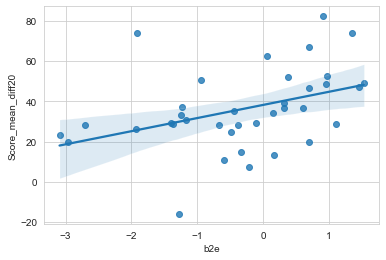

In [58]:
sns.regplot(data=df.loc['7Networks_LH_Default_PFC_9'], x='b2e', y='Score_mean_diff20')

In [59]:
import pingouin as pg

In [77]:
dfc = []
X = ['baseline', 'early', 'late', 'b2e', 'e2l']
Y = ['Score_mean_diff20', 'Score_r']
for x in X:
    for y in Y:
        r = df.groupby(level=0).apply(r_value, x=x, y=y)    # grouped by region
        p = df.groupby(level=0).apply(p_value, x=x, y=y)
        _, pcorr = pg.multicomp(p, method='fdr_bh')
        pcorr = pd.Series(pcorr, index=p.index)
        dfc.append(pd.concat([r, p, pcorr], axis=1, keys=['r', 'p', 'pcor']))
dfc = pd.concat(dfc, axis=1, keys=[x+'__'+y for x in X for y in Y])
dfc.head()

baseline__Score_mean_diff20                      \
                                                   r         p      pcor   
region                                                                     
7Networks_LH_Cont_Cing_1                    0.057027  0.737437  0.992536   
7Networks_LH_Cont_Cing_2                   -0.017855  0.916465  0.992536   
7Networks_LH_Cont_Cing_3                   -0.021274  0.900544  0.992536   
7Networks_LH_Cont_Cing_4                   -0.158634  0.348364  0.823405   
7Networks_LH_Cont_Cing_5                   -0.126584  0.455329  0.851694   

                         baseline__Score_r                      \
                                         r         p      pcor   
region                                                           
7Networks_LH_Cont_Cing_1         -0.016213  0.924123  0.975225   
7Networks_LH_Cont_Cing_2          0.020947  0.902062  0.970159   
7Networks_LH_Cont_Cing_3         -0.002436  0.988582  0.995281   
7Networks_LH_Cont_Cing_4         -0.189058  0.262430  0.764503   
7Networks_LH_Cont_Cing_5         -0.042217  0.804063  0.953733   

                         early__Score_mean_diff20                      \
                                                r         p      pcor   
region                                                                  
7Networks_LH_Cont_Cing_1                -0.090223  0.595383  0.948129   
7Networks_LH_Cont_Cing_2                -0.200948  0.233034  0.948129   
7Networks_LH_Cont_Cing_3                 0.131816  0.436752  0.948129   
7Networks_LH_Cont_Cing_4                -0.242624  0.147927  0.948129   
7Networks_LH_Cont_Cing_5                 0.034039  0.841480  0.980326   

                         early__Score_r  ... b2e__Score_mean_diff20  \
                                      r  ...                   pcor   
region                                   ...                          
7Networks_LH_Cont_Cing_1      -0.152389  ...               0.996631   
7Networks_LH_Cont_Cing_2      -0.134062  ...               0.996631   
7Networks_LH_Cont_Cing_3       0.089496  ...               0.996631   
7Networks_LH_Cont_Cing_4      -0.269387  ...               0.996631   
7Networks_LH_Cont_Cing_5      -0.185230  ...               0.996631   

                         b2e__Score_r                      \
                                    r         p      pcor   
region                                                      
7Networks_LH_Cont_Cing_1    -0.098692  0.561149  0.999383   
7Networks_LH_Cont_Cing_2    -0.110309  0.515731  0.999383   
7Networks_LH_Cont_Cing_3     0.059904  0.724694  0.999383   
7Networks_LH_Cont_Cing_4    -0.037991  0.823348  0.999383   
7Networks_LH_Cont_Cing_5    -0.114975  0.498016  0.999383   

                         e2l__Score_mean_diff20                      \
                                              r         p      pcor   
region                                                                
7Networks_LH_Cont_Cing_1               0.165599  0.327329  0.944167   
7Networks_LH_Cont_Cing_2               0.201751  0.231134  0.944167   
7Networks_LH_Cont_Cing_3              -0.072015  0.671884  0.974312   
7Networks_LH_Cont_Cing_4               0.305845  0.065633  0.910116   
7Networks_LH_Cont_Cing_5              -0.011276  0.947189  0.982066   

                         e2l__Score_r                      
                                    r         p      pcor  
region                                                     
7Networks_LH_Cont_Cing_1     0.110317  0.515699  0.930743  
7Networks_LH_Cont_Cing_2     0.157758  0.351065  0.902431  
7Networks_LH_Cont_Cing_3    -0.052943  0.755646  0.959587  
7Networks_LH_Cont_Cing_4     0.182392  0.279936  0.902431  
7Networks_LH_Cont_Cing_5     0.186219  0.269795  0.902431  

[5 rows x 30 columns]

In [61]:
dfc.loc[:, 'b2e__Score_r'].head()

,r,p,pcor
region,,,
7Networks_LH_Cont_Cing_1,-0.098692,0.561149,0.999383
7Networks_LH_Cont_Cing_2,-0.110309,0.515731,0.999383
7Networks_LH_Cont_Cing_3,0.059904,0.724694,0.999383
7Networks_LH_Cont_Cing_4,-0.037991,0.823348,0.999383
7Networks_LH_Cont_Cing_5,-0.114975,0.498016,0.999383


# plot on brain

In [62]:
from gradecc.load_data.ts import timeseries
ts = timeseries(subject=2, epoch='baseline')
region_names = ts.columns.tolist()
# region_names is sorted as plot brain needs

# setup brain plot
from brainspace.datasets import load_conte69
from brainspace.utils.parcellation import map_to_labels
import nibabel
from surfplot import Plot

fname = '/Users/qasem/PycharmProjects/gradients-rl-task/data/Schaefer2018_1000Parcels_7Networks_order.dlabel.nii'
l_hemi, r_hemi = load_conte69()
vertices = nibabel.load(fname).get_fdata()[0]

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


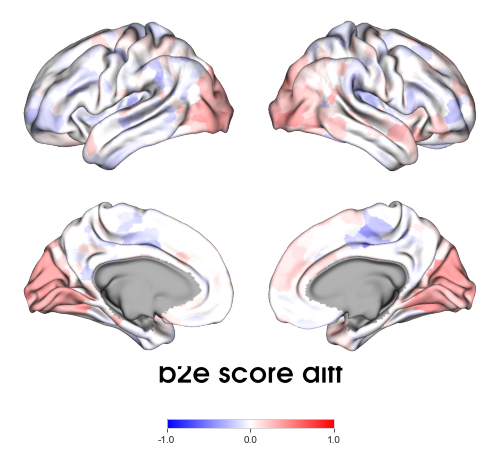

In [85]:
data = dfc.loc[:, 'b2e__Score_mean_diff20']
data = data.loc[region_names]
data = data['r']
data = map_to_labels(data, vertices, mask=(vertices != 0))
p = Plot(surf_lh=l_hemi, surf_rh=r_hemi, layout='grid', size=(900, 700), label_text={'bottom':['b2e score diff']}, )
p.add_layer(data, cbar=True, color_range=(-1, 1), cmap='bwr')
_ = p.build()

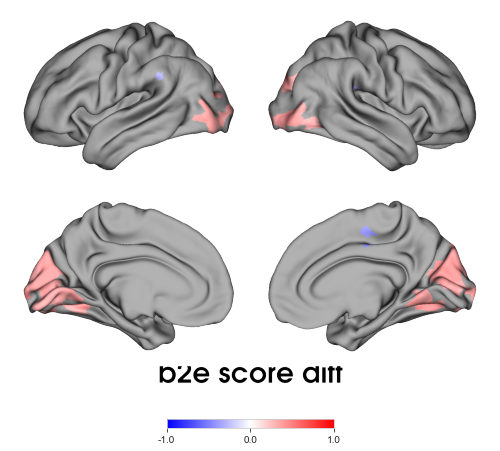

In [86]:
data = dfc.loc[:, 'b2e__Score_mean_diff20']
data = data.loc[region_names]
data = data.apply(lambda row: row['r'] if row['p'] < 0.05 else None, axis=1).values
data = map_to_labels(data, vertices, mask=(vertices != 0))
p = Plot(surf_lh=l_hemi, surf_rh=r_hemi, layout='grid', size=(900, 700), label_text={'bottom':['b2e score diff']}, )
p.add_layer(data, cbar=True, color_range=(-1, 1), cmap='bwr')
_ = p.build()

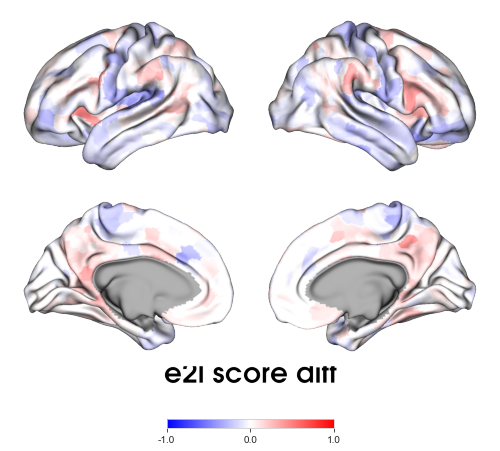

In [87]:
data = dfc.loc[:, 'e2l__Score_mean_diff20']
data = data.loc[region_names]
data = data['r']
data = map_to_labels(data, vertices, mask=(vertices != 0))
p = Plot(surf_lh=l_hemi, surf_rh=r_hemi, layout='grid', size=(900, 700), label_text={'bottom':['e2l score diff']}, )
p.add_layer(data, cbar=True, color_range=(-1, 1), cmap='bwr')
_ = p.build()

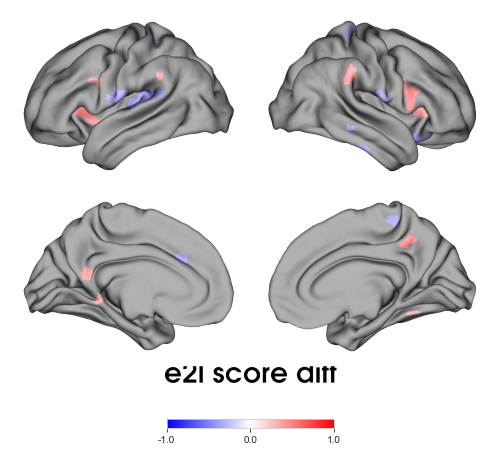

In [88]:
data = dfc.loc[:, 'e2l__Score_mean_diff20']
data = data.loc[region_names]
data = data.apply(lambda row: row['r'] if row['p'] < 0.05 else None, axis=1).values
data = map_to_labels(data, vertices, mask=(vertices != 0))
p = Plot(surf_lh=l_hemi, surf_rh=r_hemi, layout='grid', size=(900, 700), label_text={'bottom':['e2l score diff']}, )
p.add_layer(data, cbar=True, color_range=(-1, 1), cmap='bwr')
_ = p.build()

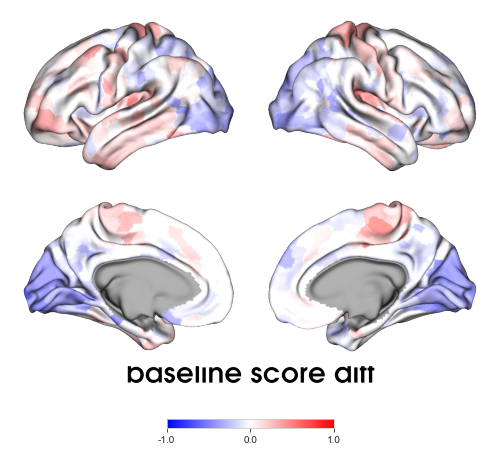

In [89]:
data = dfc.loc[:, 'baseline__Score_mean_diff20']
data = data.loc[region_names]
data = data['r']
data = map_to_labels(data, vertices, mask=(vertices != 0))
p = Plot(surf_lh=l_hemi, surf_rh=r_hemi, layout='grid', size=(900, 700), label_text={'bottom':['baseline score diff']}, )
p.add_layer(data, cbar=True, color_range=(-1, 1), cmap='bwr')
_ = p.build()

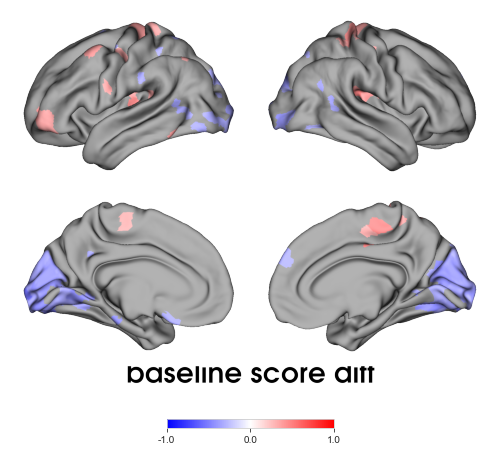

In [90]:
data = dfc.loc[:, 'baseline__Score_mean_diff20']
data = data.loc[region_names]
data = data.apply(lambda row: row['r'] if row['p'] < 0.05 else None, axis=1).values
data = map_to_labels(data, vertices, mask=(vertices != 0))
p = Plot(surf_lh=l_hemi, surf_rh=r_hemi, layout='grid', size=(900, 700), label_text={'bottom':['baseline score diff']}, )
p.add_layer(data, cbar=True, color_range=(-1, 1), cmap='bwr')
_ = p.build()

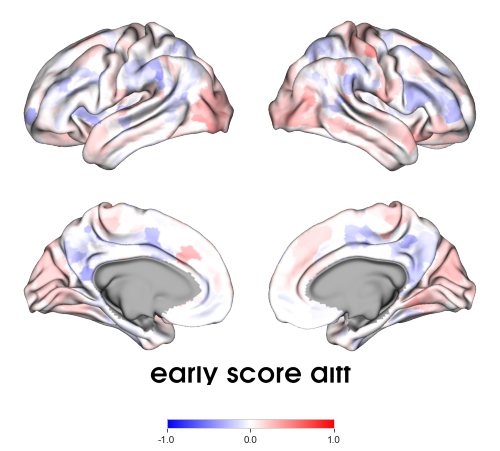

In [91]:
data = dfc.loc[:, 'early__Score_mean_diff20']
data = data.loc[region_names]
data = data['r']
data = map_to_labels(data, vertices, mask=(vertices != 0))
p = Plot(surf_lh=l_hemi, surf_rh=r_hemi, layout='grid', size=(900, 700), label_text={'bottom':['early score diff']}, )
p.add_layer(data, cbar=True, color_range=(-1, 1), cmap='bwr')
_ = p.build()

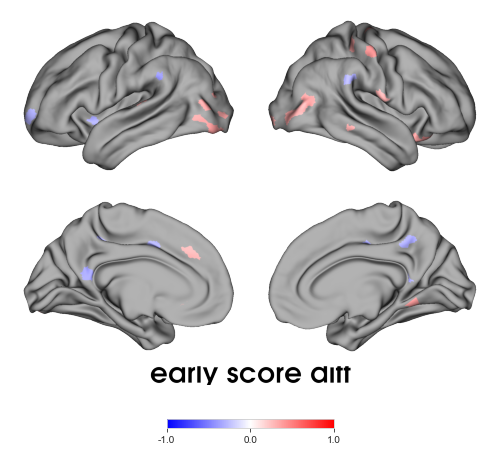

In [93]:
data = dfc.loc[:, 'early__Score_mean_diff20']
data = data.loc[region_names]
data = data.apply(lambda row: row['r'] if row['p'] < 0.05 else None, axis=1).values
data = map_to_labels(data, vertices, mask=(vertices != 0))
p = Plot(surf_lh=l_hemi, surf_rh=r_hemi, layout='grid', size=(900, 700), label_text={'bottom':['early score diff']}, )
p.add_layer(data, cbar=True, color_range=(-1, 1), cmap='bwr')
_ = p.build()

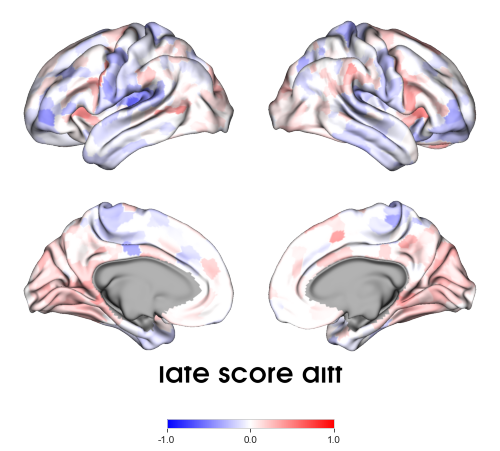

In [94]:
data = dfc.loc[:, 'late__Score_mean_diff20']
data = data.loc[region_names]
data = data['r']
data = map_to_labels(data, vertices, mask=(vertices != 0))
p = Plot(surf_lh=l_hemi, surf_rh=r_hemi, layout='grid', size=(900, 700), label_text={'bottom':['late score diff']}, )
p.add_layer(data, cbar=True, color_range=(-1, 1), cmap='bwr')
_ = p.build()

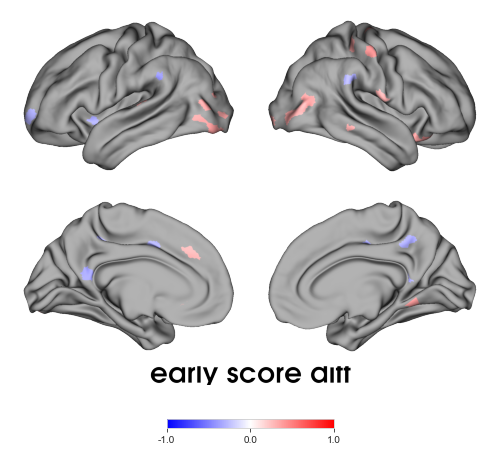

In [92]:
data = dfc.loc[:, 'early__Score_mean_diff20']
data = data.loc[region_names]
data = data.apply(lambda row: row['r'] if row['p'] < 0.05 else None, axis=1).values
data = map_to_labels(data, vertices, mask=(vertices != 0))
p = Plot(surf_lh=l_hemi, surf_rh=r_hemi, layout='grid', size=(900, 700), label_text={'bottom':['early score diff']}, )
p.add_layer(data, cbar=True, color_range=(-1, 1), cmap='bwr')
_ = p.build()

the only regions FDR significant. for baseline__Score_r

In [65]:
sig = dfc.xs('pcor', axis=1, level=1) < .05
dfc.iloc[:, 1].loc[sig.iloc[:, 1]]

region
7Networks_RH_Vis_17    0.000267
Name: (baseline__Score_mean_diff20, p), dtype: float64